In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
resultados = pd.read_csv("./elecciones2020_50perc.csv", encoding = "ISO-8859-1")
resultados.head()

,CODIGO_MESA,CANDIDATURA,ID_PAIS,PAIS,ID_DEPARTAMENTO,DEPARTAMENTO,CIRCUNSCRIPCION_UNINOMINAL,CIRCUNSCRIPCION_ESPECIAL,ID_PROVINCIA,PROVINCIA,...,CONAMAQ,OICH,ORCAWETA,YAMINAWA,VOTO_VALIDO,VOTO_BLANCO,VOTO_NULO,VOTO_EMITIDO,VOTO_VALIDO_SISTEMA,VOTO_EMITIDO_SISTEMA
0,1001,PRESIDENTE,4,Alemania,61,Berlín,0,0,1,Berlín,...,0,0,0,0,141,0,0,141,141,141
1,1002,PRESIDENTE,4,Alemania,61,Berlín,0,0,1,Berlín,...,0,0,0,0,33,0,1,34,33,34
2,1004,PRESIDENTE,11,Argentina,10,Buenos Aires,0,0,1,Buenos Aires,...,0,0,0,0,130,0,3,133,130,133
3,1005,PRESIDENTE,11,Argentina,10,Buenos Aires,0,0,1,Buenos Aires,...,0,0,0,0,152,1,4,157,152,157
4,1006,PRESIDENTE,11,Argentina,10,Buenos Aires,0,0,1,Buenos Aires,...,0,0,0,0,121,0,7,128,121,128


In [4]:
#agrupa por pais y suma todos los votos del mismo
dfPaises = resultados.groupby(['PAIS']).agg({'CREEMOS': 'sum', 'ADN': 'sum','MAS_IPSP': 'sum', 'FPV': 'sum','PAN_BOL': 'sum', 'LIBRE_21': 'sum','CC': 'sum', 'JUNTOS': 'sum'})


#dfPaises = dfPaises.sort_values(by=['MAS_IPSP'], ascending = False)

dfPaises['TOTAL'] = dfPaises.apply(lambda row: row['CREEMOS'] + row['ADN'] + row['MAS_IPSP'] + row['FPV'] + row['PAN_BOL'] + row['LIBRE_21'] + row['CC'] + row['JUNTOS'], axis=1)

s=0
for row in dfPaises.iterrows():
    s += row[1][8]
print('Total de votos: {}'.format(s))

Total de votos: 6689620


In [5]:
dfPaises['CREEMOS_N'] = dfPaises.apply(lambda row: row['CREEMOS'] / row['TOTAL'], axis=1)
dfPaises['ADN_N'] = dfPaises.apply(lambda row: row['ADN'] / row['TOTAL'], axis=1)
dfPaises['MAS_IPSP_N'] = dfPaises.apply(lambda row: row['MAS_IPSP'] / row['TOTAL'], axis=1)
dfPaises['FPV_N'] = dfPaises.apply(lambda row: row['FPV'] / row['TOTAL'], axis=1)
dfPaises['PAN_BOL_N'] = dfPaises.apply(lambda row: row['PAN_BOL'] / row['TOTAL'], axis=1)
dfPaises['LIBRE_21_N'] = dfPaises.apply(lambda row: row['LIBRE_21'] / row['TOTAL'], axis=1)
dfPaises['CC_N'] = dfPaises.apply(lambda row: row['CC'] / row['TOTAL'], axis=1)
dfPaises['JUNTOS_N'] = dfPaises.apply(lambda row: row['JUNTOS'] / row['TOTAL'], axis=1)
dfPaises.head()

,CREEMOS,ADN,MAS_IPSP,FPV,PAN_BOL,LIBRE_21,CC,JUNTOS,TOTAL,CREEMOS_N,ADN_N,MAS_IPSP_N,FPV_N,PAN_BOL_N,LIBRE_21_N,CC_N,JUNTOS_N
PAIS,,,,,,,,,,,,,,,,,
Alemania,3,0,41,0,1,0,129,0,174,0.017241,0.000000,0.235632,0.000000,0.005747,0.000000,0.741379,0.0
Argentina,1241,0,48360,927,824,0,3919,0,55271,0.022453,0.000000,0.874962,0.016772,0.014908,0.000000,0.070905,0.0
Austria,2,0,16,0,0,0,36,0,54,0.037037,0.000000,0.296296,0.000000,0.000000,0.000000,0.666667,0.0
Bolivia,1188668,531,3181394,94912,51446,1791,2061093,0,6579835,0.180653,0.000081,0.483507,0.014425,0.007819,0.000272,0.313244,0.0
Brasil,729,0,17207,461,98,0,1573,0,20068,0.036326,0.000000,0.857435,0.022972,0.004883,0.000000,0.078383,0.0


In [6]:
dfPaises.to_csv('./PaisesNorm.csv')

In [7]:
dfPaisesMasistas = dfPaises.sort_values(by=['MAS_IPSP_N'], ascending = False)
dfPaisesMasistas.head(10)

#clean print
print('RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS MASISTAS')
numRows = 10
curr = 0
for row in dfPaisesMasistas.iterrows():
    if curr < numRows:
        print('{}: {} con {}%, ({} votos)'.format(curr+1, row[0], int(row[1][11] * 100), int(row[1][8])))
        curr += 1
    else:
        break


RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS MASISTAS
1: Argentina con 87%, (55271 votos)
2: Brasil con 85%, (20068 votos)
3: India con 75%, (4 votos)
4: Bolivia con 48%, (6579835 votos)
5: Egipto con 42%, (7 votos)
6: Suecia con 39%, (104 votos)
7: Paraguay con 37%, (249 votos)
8: Chile con 37%, (1299 votos)
9: España con 32%, (21212 votos)
10: Uruguay con 32%, (108 votos)


In [8]:
dfPaisesCamachistas = dfPaises.sort_values(by=['CREEMOS_N'], ascending = False)
dfPaisesCamachistas.head(10)

#clean print
print('RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS CAMACHISTAS')
numRows = 10
curr = 0
for row in dfPaisesCamachistas.iterrows():
    if curr < numRows:
        print('{}: {} con {}%, ({} votos)'.format(curr+1, row[0], int(row[1][9] * 100), int(row[1][8])))
        curr += 1
    else:
        break

RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS CAMACHISTAS
1: Suiza con 58%, (794 votos)
2: Gran Bretaña con 44%, (151 votos)
3: Japón con 37%, (59 votos)
4: España con 32%, (21212 votos)
5: Chile con 29%, (1299 votos)
6: Francia con 26%, (500 votos)
7: Paises Bajos con 26%, (84 votos)
8: Italia con 26%, (3788 votos)
9: Estados Unidos con 23%, (4759 votos)
10: Paraguay con 21%, (249 votos)


In [9]:
dfPaisesMesistas = dfPaises.sort_values(by=['CC_N'], ascending = False)
dfPaisesMesistas.head(10)

#clean print
print('RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS MESISTAS')
numRows = 10
curr = 0
for row in dfPaisesMesistas.iterrows():
    if curr < numRows:
        print('{}: {} con {}%, ({} votos)'.format(curr+1, row[0], int(row[1][15] * 100), int(row[1][8])))
        curr += 1
    else:
        break

RANKING PAISES CON MAYOR ÍNDICE DE BOLIVIANOS MESISTAS
1: China con 86%, (15 votos)
2: México con 84%, (212 votos)
3: Colombia con 76%, (99 votos)
4: Alemania con 74%, (174 votos)
5: Costa Rica con 72%, (83 votos)
6: Austria con 66%, (54 votos)
7: Bélgica con 64%, (154 votos)
8: Estados Unidos con 59%, (4759 votos)
9: Paises Bajos con 58%, (84 votos)
10: Egipto con 57%, (7 votos)


In [10]:
dfSoloBolivia = resultados.copy()
dfSoloBoliviaStatic = resultados.copy()

for i, row in dfSoloBoliviaStatic.iterrows():
    if row[3] != 'Bolivia':
        dfSoloBolivia.drop(index = i, inplace = True)
dfSoloBolivia.head()

,CODIGO_MESA,CANDIDATURA,ID_PAIS,PAIS,ID_DEPARTAMENTO,DEPARTAMENTO,CIRCUNSCRIPCION_UNINOMINAL,CIRCUNSCRIPCION_ESPECIAL,ID_PROVINCIA,PROVINCIA,...,CONAMAQ,OICH,ORCAWETA,YAMINAWA,VOTO_VALIDO,VOTO_BLANCO,VOTO_NULO,VOTO_EMITIDO,VOTO_VALIDO_SISTEMA,VOTO_EMITIDO_SISTEMA
888,10001,PRESIDENTE,32,Bolivia,1,Chuquisaca,0,0,1,Oropeza,...,0,0,0,0,92,3,6,101,92,101
889,10002,PRESIDENTE,32,Bolivia,1,Chuquisaca,0,0,1,Oropeza,...,0,0,0,0,194,3,1,198,194,198
890,10003,PRESIDENTE,32,Bolivia,1,Chuquisaca,0,0,1,Oropeza,...,0,0,0,0,63,3,3,69,63,69
891,10004,PRESIDENTE,32,Bolivia,1,Chuquisaca,0,0,1,Oropeza,...,0,0,0,0,184,13,2,199,184,199
892,10005,PRESIDENTE,32,Bolivia,1,Chuquisaca,0,0,1,Oropeza,...,0,0,0,0,178,9,8,195,178,195


In [11]:
dfSoloBolivia.to_csv('./SoloBolivia.csv')

GENERACION DE GRAFICOS

In [12]:
#funcion de ayuda
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

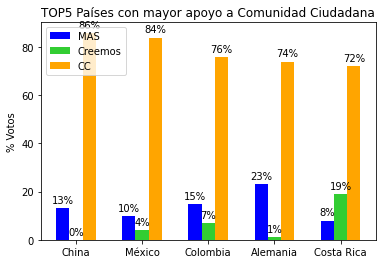

In [13]:
paises = []
votosMas = []
votosCreemos = []
votosCC = []
numRows = 5
curr = 0

for row in dfPaisesMesistas.iterrows():
    if curr < numRows:
        paises.append(row[0])
        votosMas.append(int(row[1][11]*100))
        votosCreemos.append(int(row[1][9]*100))
        votosCC.append(int(row[1][15]*100))
    else:
        break
    curr += 1

x = np.arange(len(paises))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, votosMas, width, label='MAS', color='b')
rects2 = ax.bar(x, votosCreemos, width, label='Creemos', color ='limegreen')
rects3 = ax.bar(x + width, votosCC, width, label='CC', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Votos')
ax.set_title('TOP5 Países con mayor apoyo a Comunidad Ciudadana')
ax.set_xticks(x)
ax.set_xticklabels(paises)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

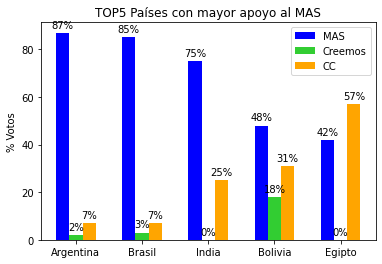

In [14]:
paises = []
votosMas = []
votosCreemos = []
votosCC = []
numRows = 5
curr = 0

for row in dfPaisesMasistas.iterrows():
    if curr < numRows:
        paises.append(row[0])
        votosMas.append(int(row[1][11]*100))
        votosCreemos.append(int(row[1][9]*100))
        votosCC.append(int(row[1][15]*100))
    else:
        break
    curr += 1

x = np.arange(len(paises))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, votosMas, width, label='MAS', color='b')
rects2 = ax.bar(x, votosCreemos, width, label='Creemos', color ='limegreen')
rects3 = ax.bar(x + width, votosCC, width, label='CC', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Votos')
ax.set_title('TOP5 Países con mayor apoyo al MAS')
ax.set_xticks(x)
ax.set_xticklabels(paises)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

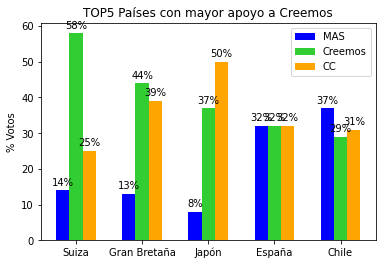

In [15]:
paises = []
votosMas = []
votosCreemos = []
votosCC = []
numRows = 5
curr = 0

for row in dfPaisesCamachistas.iterrows():
    if curr < numRows:
        paises.append(row[0])
        votosMas.append(int(row[1][11]*100))
        votosCreemos.append(int(row[1][9]*100))
        votosCC.append(int(row[1][15]*100))
    else:
        break
    curr += 1

x = np.arange(len(paises))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, votosMas, width, label='MAS', color='b')
rects2 = ax.bar(x, votosCreemos, width, label='Creemos', color ='limegreen')
rects3 = ax.bar(x + width, votosCC, width, label='CC', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Votos')
ax.set_title('TOP5 Países con mayor apoyo a Creemos')
ax.set_xticks(x)
ax.set_xticklabels(paises)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

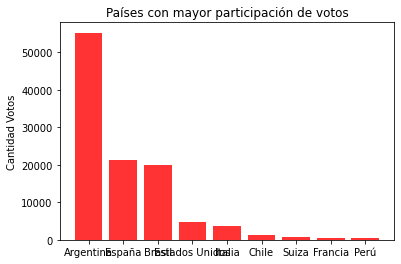

In [16]:
#los países que emitieron la mayor cantidad de votos
dfParticipacion = dfPaises.sort_values(by=['TOTAL'], ascending = False)


paises = []
votos = []
numRows = 10
curr = 0
for row in dfParticipacion.iterrows():
    if curr == 0:
        pass
    elif curr < numRows:
        paises.append(row[0])
        votos.append(int(row[1][8]))
    else:
        break
    curr += 1

x = np.arange(len(paises))
width = 40

plt.bar(x, votos, align='center', color='r', alpha=0.8)

plt.xticks(x, paises)
plt.ylabel('Cantidad Votos')
plt.title('Países con mayor participación de votos')
plt.rcParams["figure.figsize"] = (6,3)

plt.show()

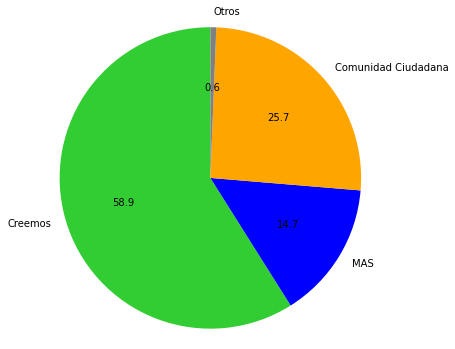

In [17]:
#Votos por pais en un pie-chart
PAIS = "Suiza" #Cambiar aqui

votos = []
for row in dfPaises.iterrows():
    if row[0] == PAIS:
        votos = [row[1][9], row[1][11], row[1][15], 1-row[1][9]-row[1][11]-row[1][15]]
        break

partidos = ['Creemos', 'MAS', 'Comunidad Ciudadana', 'Otros']
colors  = ("limegreen", "blue", "orange", "gray")


figureObject, axesObject = plt.subplots(figsize=(6, 6))

axesObject.pie(votos,labels=partidos,colors=colors,autopct='%1.1f', startangle=90)
axesObject.axis('equal')

plt.savefig('foo.png')
 

plt.show()

<ipython-input-86-68aceefae2e0>:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  axesObject.pie(votos,labels=partidos,colors=colors,autopct='%1.1f', startangle=90)
<ipython-input-86-68aceefae2e0>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figureObject, axesObject = plt.subplots(figsize=(6, 6))


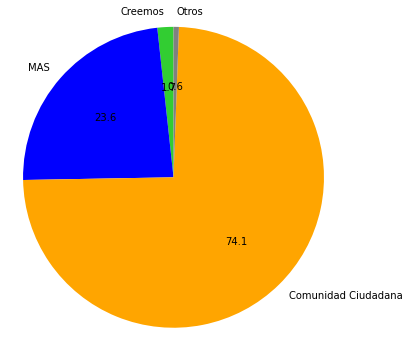

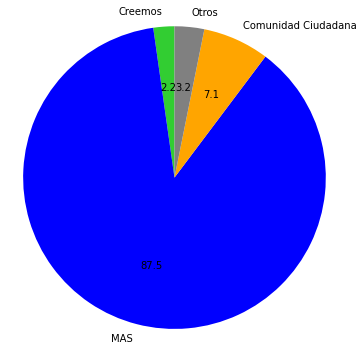

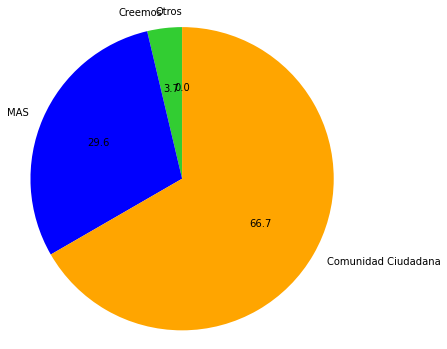

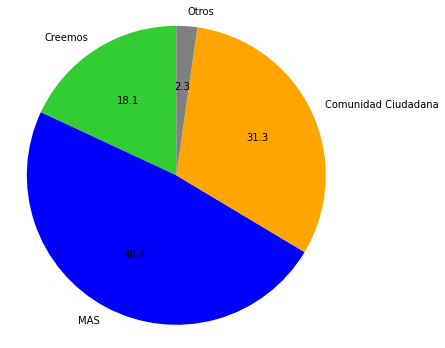

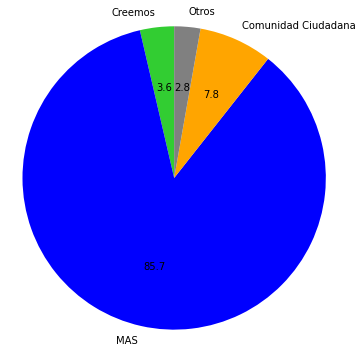

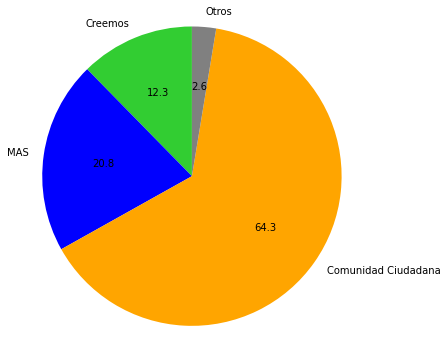

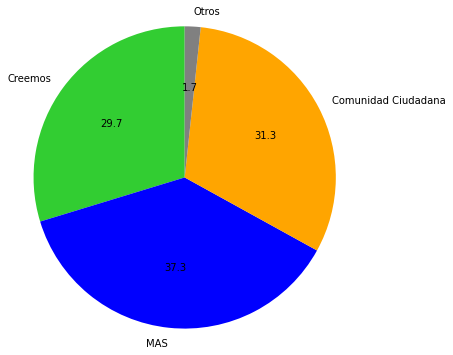

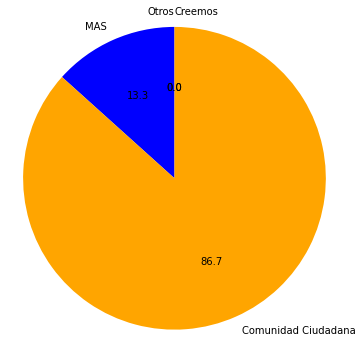

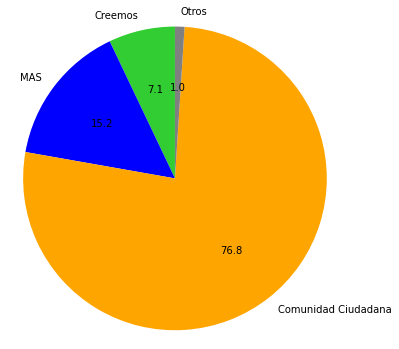

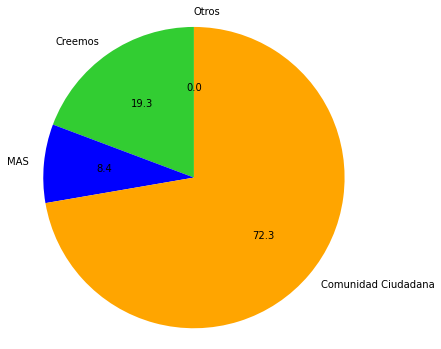

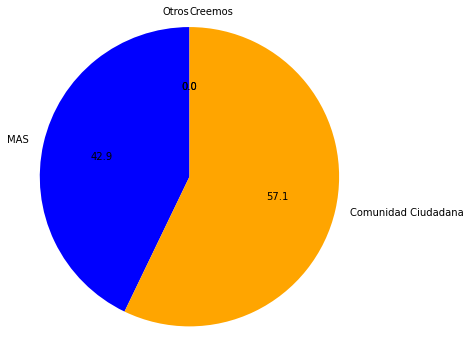

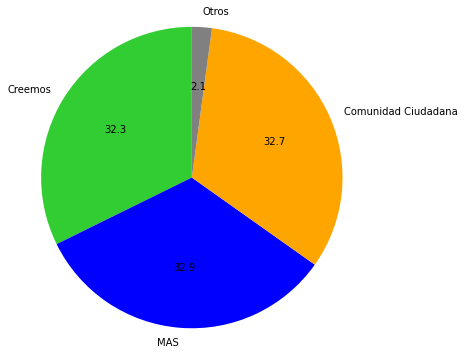

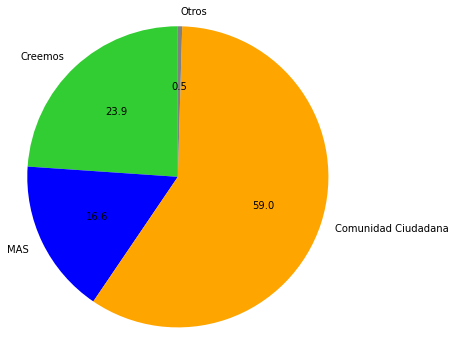

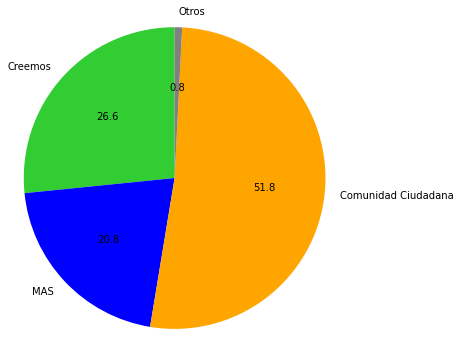

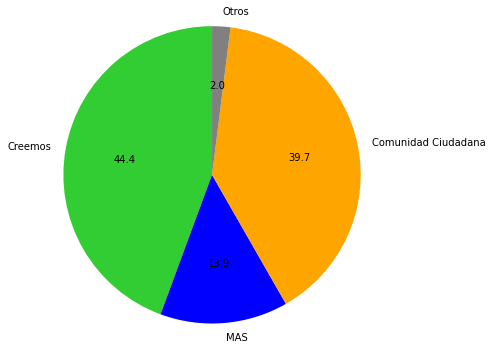

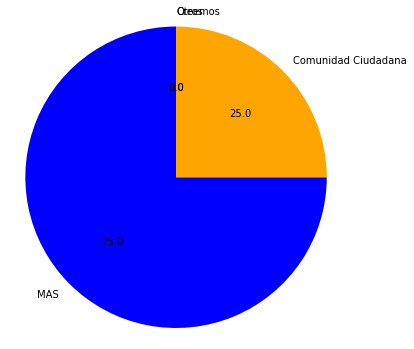

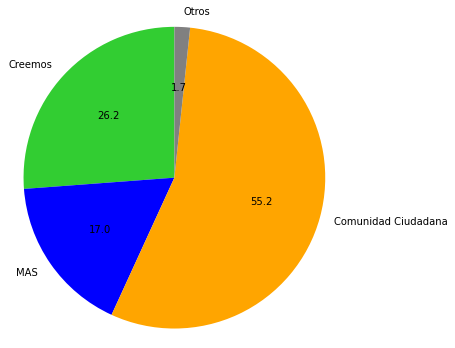

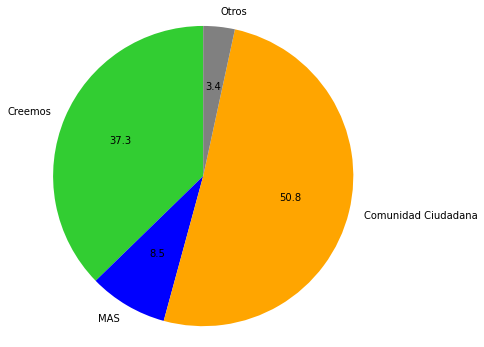

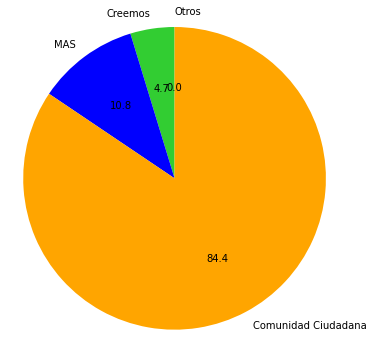

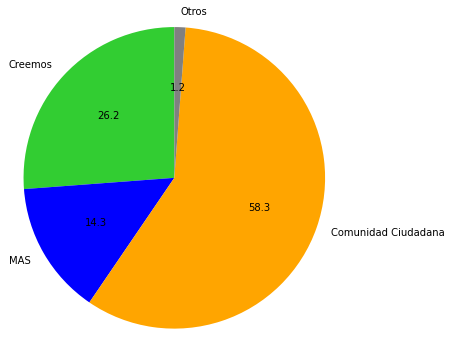

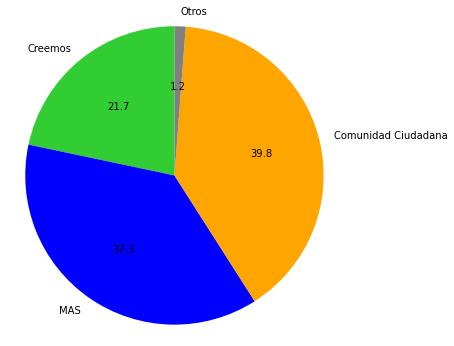

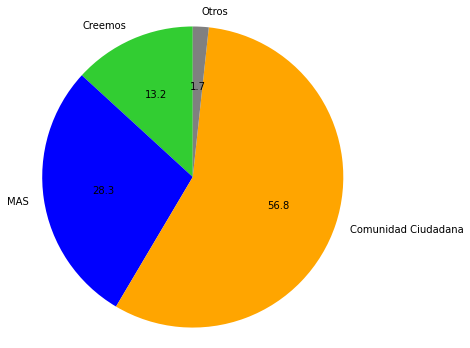

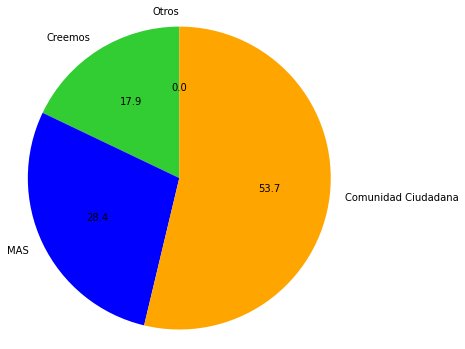

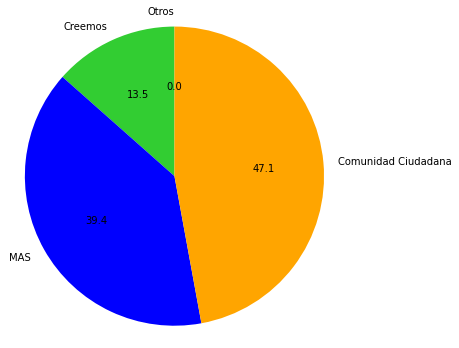

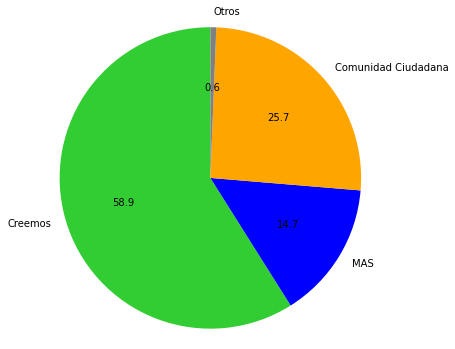

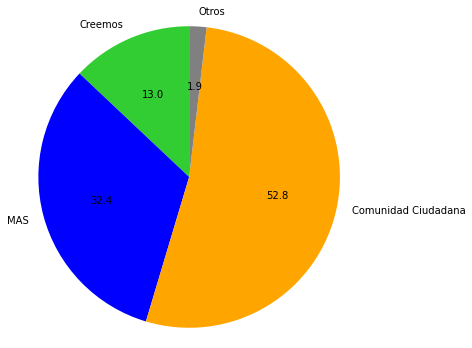

In [86]:
carpeta = './chartsElecciones/Exterior/'
partidos = ['Creemos', 'MAS', 'Comunidad Ciudadana', 'Otros']
colors  = ("limegreen", "blue", "orange", "gray")

votos = []
for row in dfPaises.iterrows():
    pais = row[0]
    votos = [row[1][9], row[1][11], row[1][15], 1-row[1][9]-row[1][11]-row[1][15]]

    figureObject, axesObject = plt.subplots(figsize=(6, 6))

    axesObject.pie(votos,labels=partidos,colors=colors,autopct='%1.1f', startangle=90)
    axesObject.axis('equal')

    plt.savefig('{}{}.jpg'.format(carpeta, pais))

In [87]:
#porcentaje de votos de los departamentos
dfBolivia = dfSoloBolivia.groupby(['DEPARTAMENTO']).agg({'CREEMOS': 'sum', 'ADN': 'sum','MAS_IPSP': 'sum', 'FPV': 'sum','PAN_BOL': 'sum', 'LIBRE_21': 'sum','CC': 'sum', 'JUNTOS': 'sum'})

dfBolivia.head()

,CREEMOS,ADN,MAS_IPSP,FPV,PAN_BOL,LIBRE_21,CC,JUNTOS
DEPARTAMENTO,,,,,,,,
Beni,88856,29,110115,5019,1046,95,122264,0
Chuquisaca,28993,81,269267,5867,5322,489,238917,0
Cochabamba,19267,0,637296,10146,2498,30,302944,0
La Paz,19141,125,915276,26151,12928,653,511832,0
Oruro,5500,3,149642,6147,5897,4,124189,0
